## Cropping images using OpenCV

Import the cv2 python library

In [1]:
import cv2 # Import the OpenCV python library
from matplotlib import pyplot as plt
import requests
url = "https://cdn.pixabay.com/photo/2021/02/12/02/01/rosebud-6006985_1280.jpg"
r = requests.get(url)
with open('test.jpg', 'wb') as f:
    f.write(r.content) 

Read and display the image using imread() and imshow() functions respectively

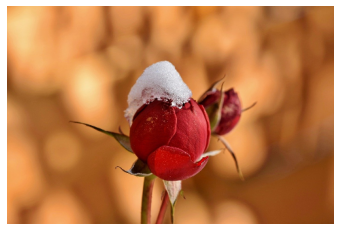

(333, 500, 3)


In [2]:
image=cv2.imread('test.jpg') # Read the image
plt.axis("off")
image = cv2.resize(image, (500, 333))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show() # Display the original image
print(image.shape)

As images are passed as an array in OpenCV, therefore, we use slicing to crop an image. 

The syntax to crop an image is: image[start_x:end_x, start_y:end_y]

Enter Start point on x axis:30
Enter Start point on y axis:330
Enter width of cropped image:30
Enter height of cropped image:300


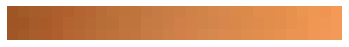

(3, 30, 3)


In [3]:
x=int(input("Enter Start point on x axis:"))
y=int(input("Enter Start point on y axis:"))

w=int(input("Enter width of cropped image:"))
h=int(input("Enter height of cropped image:"))

cropped_image = image[y:y+h, x:x+w] # Cropping using Slicing
plt.axis("off")
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.show() # Display the original image
print(cropped_image.shape)

## Dividing an Image Into Small Patches Using Cropping

In [4]:
!mkdir saved_patches

mkdir: cannot create directory ‘saved_patches’: File exists


In [5]:
url = "https://drive.google.com/uc?id=1NHKcMhYUyAqjAGQ_jt6j36wzZIvq-Y04&export=download"
r = requests.get(url)
with open('test_cropped.jpg', 'wb') as f:
    f.write(r.content) 

(229, 314, 3)


True

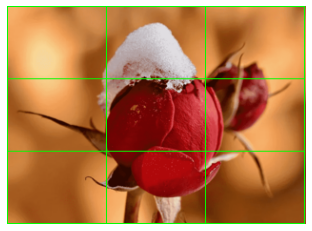

In [6]:
img =  cv2.imread("test_cropped.jpg")
image_copy = img.copy() 
print(img.shape)

#Set height and width to image height and width
imgheight=img.shape[0]
imgwidth=img.shape[1]

M = 76
N = 104
x1 = 0
y1 = 0

for y in range(0, imgheight, M):
    for x in range(0, imgwidth, N):
        if (imgheight - y) < M or (imgwidth - x) < N:
            break
            
        y1 = y + M
        x1 = x + N

        # check whether the patch width or height exceeds the image width or height
        if x1 >= imgwidth and y1 >= imgheight:
            x1 = imgwidth - 1
            y1 = imgheight - 1
            #Crop into patches of size MxN
            tiles = image_copy[y:y+M, x:x+N]
            #Save each patch into file directory
            cv2.imwrite('saved_patches/'+'tile'+str(x)+'_'+str(y)+'.jpg', tiles)
            cv2.rectangle(img, (x, y), (x1, y1), (0, 255, 0), 1)
        elif y1 >= imgheight: # when patch height exceeds the image height
            y1 = imgheight - 1
            #Crop into patches of size MxN
            tiles = image_copy[y:y+M, x:x+N]
            #Save each patch into file directory
            cv2.imwrite('saved_patches/'+'tile'+str(x)+'_'+str(y)+'.jpg', tiles)
            cv2.rectangle(img, (x, y), (x1, y1), (0, 255, 0), 1)
        elif x1 >= imgwidth: # when patch width exceeds the image width
            x1 = imgwidth - 1
            #Crop into patches of size MxN
            tiles = image_copy[y:y+M, x:x+N]
            #Save each patch into file directory
            cv2.imwrite('saved_patches/'+'tile'+str(x)+'_'+str(y)+'.jpg', tiles)
            cv2.rectangle(img, (x, y), (x1, y1), (0, 255, 0), 1)
        else:
            #Crop into patches of size MxN
            tiles = image_copy[y:y+M, x:x+N]
            #Save each patch into file directory
            cv2.imwrite('saved_patches/'+'tile'+str(x)+'_'+str(y)+'.jpg', tiles)
            cv2.rectangle(img, (x, y), (x1, y1), (0, 255, 0), 1)
        
#Save full image into file directory
plt.imshow(img[:, :, ::-1])
plt.axis('off')
cv2.imwrite("patched.jpg",img)